## 02-03 어간 추출(Stemming) and 표제어 추출(Lemmatization)

정규화 기법 중 코퍼스에 있는 단어의 개수를 줄일 수 있는 기법인 표제어 추출(lemmatization)과 어간 추출(stemming)의 개념에 대해서 알아봅니다.

### 표제어 추출(Lemmatization)

표제어(Lemma)는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미를 갖습니다. 표제어 추출은 단어들로부터 표제어를 찾아가는 과정입니다. 표제어 추출은 단어들이 다른 형태를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단합니다. 예를 들어서 am, are, is는 서로 다른 스펠링이지만 그 뿌리 단어는 be라고 볼 수 있습니다. 이때, 이 단어들의 표제어는 be라고 합니다.  
표제어 추출을 하는 가장 섬세한 방법은 단어의 형태학적 파싱을 먼저 진행하는 것입니다. 형태소란 '의미를 가진 가장 작은 단위'를 뜻합니다. 그리고 형태학(morphology)이란 형태소로부터 단어들을 만들어가는 학문을 뜻합니다. 형태소의 종류로 어간(stem)과 접사(affix)가 존재합니다.  
1. 어간(steam): 단어의 의미를 담고 있는 단어의 핵심 부분
2. 접사(affix): 단어에 추가적인 의미를 주는 부분
  
형태학적 파싱은 이 두 가지 구성 요소를 분리하는 작업을 말합니다.



In [1]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전 :',words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])

표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


위의 결과에서는 dy나 ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력하고 있습니다. 이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있기 때문입니다.  
WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수 있습니다. 즉, dies와 watched, has가 문장에서 동사로 쓰였다는 것을 알려준다면 표제어 추출기는 품사의 정보를 보존하면서 정확한 Lemma를 출력하게 됩니다.

In [4]:
lemmatizer.lemmatize('dies', 'v')

'die'

In [5]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [6]:
lemmatizer.lemmatize('has', 'v')

'have'

표제어 추출은 문맥을 고려하며 수행했을 때의 결과는 해당 단어의 품사 정보를 보존합니다. 하지만 어간 추출을 수행한 결과는 품사 정보가 보존되지 않습니다. 더 정확히는 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많습니다.

### 어간 추출(Stemming)

어간(Stem)을 추출하는 작업을 어간 추출(stemming)이라고 합니다. 어간 추출은 형태학적 분석을 단순화한 버전이라고 볼 수도 있고, 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수도 있습니다. 이 작업은 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않는 단어일 수도 있습니다.

In [7]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 :', tokenized_sentence)
print('어간 추출 후 :',[stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [8]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전 :',words)
print('어간 추출 후 :',[stemmer.stem(word) for word in words])

어간 추출 전 : ['formalize', 'allowance', 'electricical']
어간 추출 후 : ['formal', 'allow', 'electric']


In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


동일한 단어들의 나열에 대해서 두 스태머는 전혀 다른 결과를 보여줍니다. 두 스태머 알고리즘은 서로 다른 알고리즘을 사용하기 때문입니다. 그렇기 때문에 이미 알려진 알고리즘을 사용할 때는, 사용하고자 하는 코퍼스에 스태머를 적용해보고 어떤 스태머가 해당 코퍼스에 적합한지를 판단한 후에 사용하여야 합니다.

### 한국어에서의 어간 추출

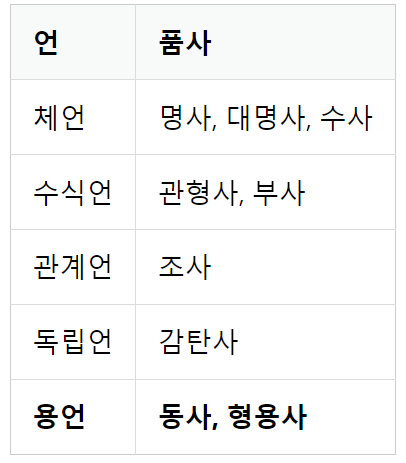

이 중 용언에 해당되는 '동사'와 '형용사'는 어간(stem)과 어미(ending)의 결합으로 구성됩니다. 

활용(conjugation): 용언이 어간(stem)이 어미(ending)를 가지는 일을 말합니다. 활용은 어간이 어미를 취할 때, 어간의 모습이 일정하다면 규칙 활용, 어간이나 어미의 모습이 변하는 불규칙 활용으로 나뉩니다.  
(1) 규칙 활용: 어간이 어미를 취할 때, 어간의 모습이 일정합니다.  
(2) 불규칙 활용: 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우를 말합니다.


